<a href="https://colab.research.google.com/github/Mehwish-data/DSMP_Assignments/blob/main/Module_2_Project_Sales_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

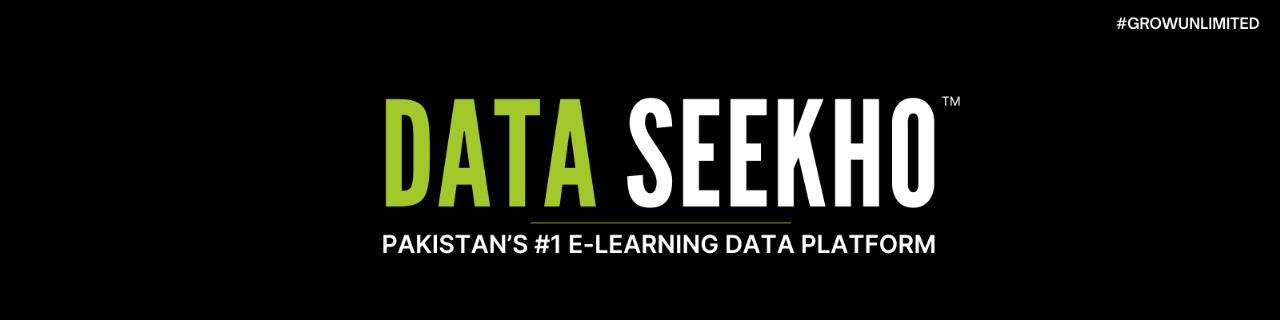

* I am **Mehwish Umar**  is an aspiring data professional at **Data Seekho**.  
*📚 Learning **Python, SQL, Machine Learning**, and more through Data Seekho’s courses.
* 💻 Engaging in hands-on projects and learning from industry experts.
* 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
* 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

# Objective: To gain business insights and understand customer and product trends through SQL queries

In [21]:
import sqlite3

# Step 1: Create and connect to in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Step 2: Create table
cursor.execute('''
CREATE TABLE sales_data (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    ProductID INTEGER,
    OrderDate TEXT,
    Quantity INTEGER,
    UnitPrice REAL,
    Region TEXT,
    Category TEXT
)
''')

#  Insert data
cursor.executescript('''
INSERT INTO sales_data (OrderID, CustomerID, ProductID, OrderDate, Quantity, UnitPrice, Region, Category) VALUES
  (1, 101, 201, '2024-01-05', 5, 20.00, 'North', 'Electronics'),
    (2, 102, 202, '2024-01-10', 2, 35.00, 'South', 'Home Appliances'),
    (3, 103, 203, '2024-02-15', 1, 120.00, 'East', 'Furniture'),
    (4, 104, 201, '2024-02-20', 10, 20.00, 'West', 'Electronics'),
    (5, 105, 204, '2024-03-01', 7, 50.00, 'North', 'Clothing'),
    (6, 106, 205, '2024-03-15', 4, 80.00, 'South', 'Footwear'),
    (7, 107, 206, '2024-04-05', 3, 100.00, 'East', 'Electronics'),
    (8, 108, 203, '2024-04-15', 2, 120.00, 'West', 'Furniture'),
    (9, 109, 204, '2024-05-05', 1, 50.00, 'North', 'Clothing'),
    (10, 110, 202, '2024-05-10', 8, 35.00, 'South', 'Home Appliances'),
    (11, 111, 207, '2024-06-05', 5, 25.00, 'East', 'Stationery'),
    (12, 112, 201, '2024-06-15', 6, 20.00, 'West', 'Electronics'),
    (13, 113, 208, '2024-07-05', 4, 15.00, 'North', 'Toys'),
    (14, 114, 206, '2024-07-10', 1, 100.00, 'South', 'Electronics'),
    (15, 115, 209, '2024-08-01', 3, 30.00, 'East', 'Books'),
    (16, 116, 210, '2024-08-15', 7, 45.00, 'West', 'Groceries'),
    (17, 117, 211, '2024-09-01', 2, 200.00, 'North', 'Jewelry'),
    (18, 118, 212, '2024-09-10', 5, 18.00, 'South', 'Accessories'),
    (19, 119, 202, '2024-10-01', 4, 35.00, 'East', 'Home Appliances'),
    (20, 120, 201, '2024-10-15', 9, 20.00, 'West', 'Electronics')
''')



In [27]:
import pandas as pd

# Run SQL SELECT command to fetch all rows
cursor.execute("SELECT * FROM sales_data")

# Convert results into a pandas DataFrame for tabular view
df = pd.DataFrame(cursor.fetchall(), columns=[description[0] for description in cursor.description])

# Display the table
df


,OrderID,CustomerID,ProductID,OrderDate,Quantity,UnitPrice,Region,Category
0,1,101,201,2024-01-05,5,20.0,North,Electronics
1,2,102,202,2024-01-10,2,35.0,South,Home Appliances
2,3,103,203,2024-02-15,1,120.0,East,Furniture
3,4,104,201,2024-02-20,10,20.0,West,Electronics
4,5,105,204,2024-03-01,7,50.0,North,Clothing
5,6,106,205,2024-03-15,4,80.0,South,Footwear
6,7,107,206,2024-04-05,3,100.0,East,Electronics
7,8,108,203,2024-04-15,2,120.0,West,Furniture
8,9,109,204,2024-05-05,1,50.0,North,Clothing
9,10,110,202,2024-05-10,8,35.0,South,Home Appliances


# **Total Sales Revenue generated across all sales.**

In [38]:
#total revenue query
cursor.execute('''SELECT SUM(Quantity * UnitPrice) AS Total_Revenue FROM sales_data''')
print("Total Sales Revenue:", cursor.fetchone()[0])

Total Sales Revenue: 3650.0


# **Identify Top 5 Best-Selling Products based on the quantity sold.**

In [43]:
cursor.execute('''SELECT ProductID, SUM(Quantity) AS Total_Quantity FROM sales_data GROUP BY ProductID ORDER BY Total_Quantity DESC LIMIT 5''')

print("Top 5 Best-Selling Products:")
for row in cursor.fetchall():
    print(row)

Top 5 Best-Selling Products:
(201, 30)
(202, 14)
(204, 8)
(210, 7)
(212, 5)


# **Monthly Sales revenue Trend for each month to identify sales trends.**

In [36]:
cursor.execute('''SELECT strftime('%Y-%m', OrderDate) AS Month, SUM(Quantity * UnitPrice) AS Monthly_Revenue FROM sales_data GROUP BY Month ORDER BY Month''')

print("Monthly Sales Trend:")
for row in cursor.fetchall():
    print(row)


Monthly Sales Trend:
('2024-01', 170.0)
('2024-02', 320.0)
('2024-03', 670.0)
('2024-04', 540.0)
('2024-05', 330.0)
('2024-06', 245.0)
('2024-07', 160.0)
('2024-08', 405.0)
('2024-09', 490.0)
('2024-10', 320.0)


# **Regional Sales Breakdown :Analyze sales revenue for each region to determine where the highest sales are occurring.**

In [35]:
cursor.execute('''SELECT Region, SUM(Quantity * UnitPrice) AS Regional_Revenue FROM sales_data GROUP BY Region ORDER BY Regional_Revenue DESC''')

print("Regional Sales Breakdown:")
for row in cursor.fetchall():
    print(row)


Regional Sales Breakdown:
('West', 1055.0)
('North', 960.0)
('South', 860.0)
('East', 775.0)


# **Most Popular Product Category:Determine which product category has the highest total sales in revenue.**

In [34]:
cursor.execute('''SELECT Category, SUM(Quantity * UnitPrice) AS Category_Revenue FROM sales_data GROUP BY Category ORDER BY Category_Revenue DESC LIMIT 1''')

print("Most Popular Product Category:")
print(cursor.fetchone())


Most Popular Product Category:
('Electronics', 1000.0)


📊 Conclusion: Sales Data Analysis
In this assignment, I performed a comprehensive analysis of the sales_data dataset using SQLite in Google Colab. The primary objective was to derive meaningful insights from the dataset and strengthen my understanding of SQL-based data analysis.

🔹 Here’s a summary of what I achieved:

✅ Total Sales Revenue
 I calculated the total revenue by multiplying Quantity and UnitPrice for each transaction. This gave me an overall understanding of how much revenue was generated across all sales.

📦 Top 5 Best-Selling Products
 I identified the top 5 products based on the total quantity sold. This helped highlight which products are most in demand.

📆 Monthly Sales Trend
 By extracting the month from the OrderDate and grouping the data accordingly, I analyzed monthly revenue to understand sales trends over time.

🌍 Regional Sales Breakdown
 I evaluated revenue by region to identify where the strongest and weakest sales occurred, providing insight into geographical performance.

🛍️ Most Popular Product Category
 I determined the product category that generated the highest revenue, helping to understand customer preferences and potential areas for business focus.

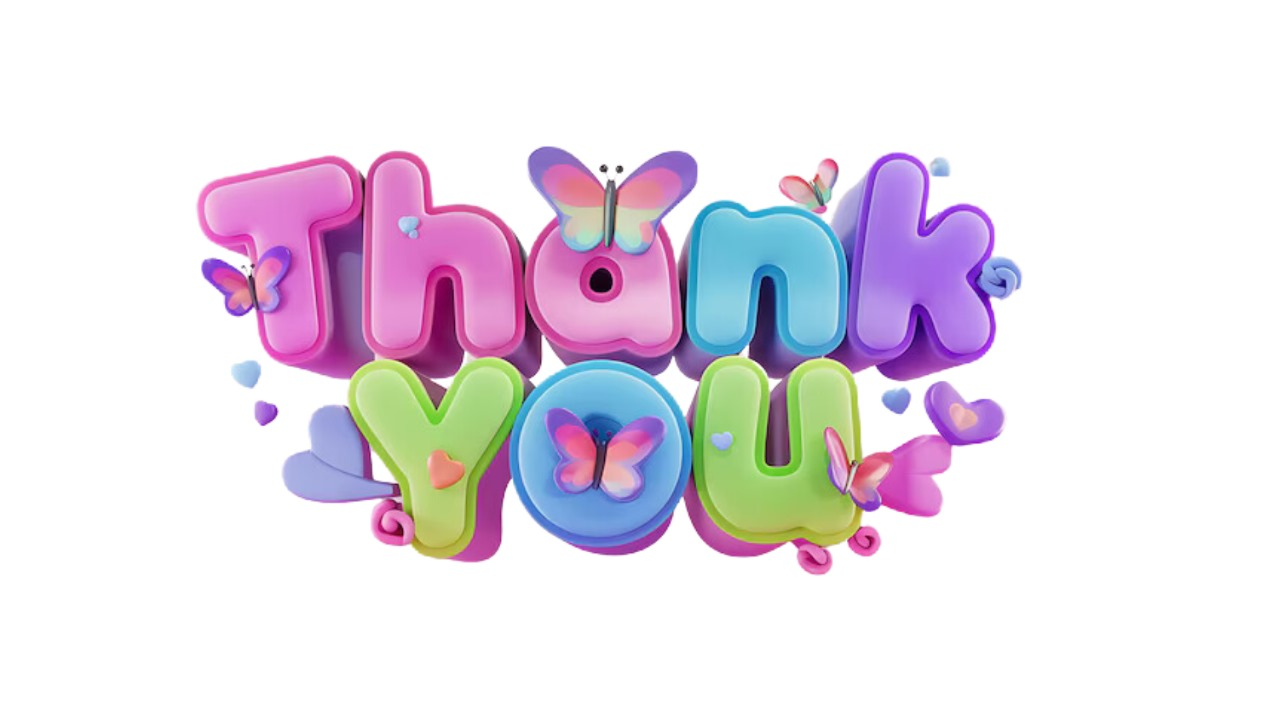